In [7]:
import cv2

import numpy as np
import torch
import torchvision
from torchvision import transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from PIL import Image
from matplotlib import pyplot as plt

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True, progress=False)
model.eval()

def get_predictions(im):
    photo = transforms.ToTensor()(im).unsqueeze_(0)
    photo.shape
    result = model(photo)[0]
    boxes = result['boxes']
    pret = []
    avg = 0
    for i in range(len(boxes)):
        if result['labels'][i] == 3 and result['scores'][i] > 0:
            x1, y1, x2, y2 = int(boxes[i][0]), int(boxes[i][1]), int(boxes[i][2]), int(boxes[i][3])
            pret.append((x1, y1, x2, y2))
            avg += abs((x2-x1)*(y2-y1))
    avg /= len(boxes)
    
    boxed = im
    taken = []
    for i in range(len(pret)):
        x1, y1, x2, y2 = pret[i]
        space = abs((x2-x1)*(y2-y1))
        if space < avg * 1.5 and space > avg / 1.5:
            boxed = cv2.rectangle(np.asarray(boxed), (x1, y1), (x2, y2), (0,255,0), 2)
            taken.append((x1, y1, x2, y2))
    return boxed, taken

def get_busy(img, coors):
    boxed, taken = (get_predictions(im))
    busy = []
    for t in taken:
        c = ((t[0] + t[2]) / 2, (t[1] + t[3]) / 2)
        dist = min([abs(c[0] - t[0]), abs(c[1] - t[1]), abs(c[0] - t[2]), abs(c[1] - t[3])]) * 8
        for key in coors.keys():
            x, y = coors[key]
            if (x - c[0]) ** 2 + (y - c[1]) ** 2 < dist:
                busy.append(key)
    return list(set(busy))

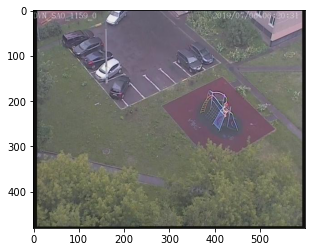

In [8]:
im = Image.open("example_image.jpg")
plt.imshow(im)

In [3]:
inputs = {'1': (100, 65), '2': (116, 85), '3': (139, 115), '4': (159, 135),  '5': (210, 185),
          '6': (245, 165), '7': (280, 150), '8': (315, 135), '9': (345, 120), '10': (380, 105)}
coordinates = {'1': (55.892209, 37.540896), '2': (55.892184, 37.540899), '3': (55.892161, 37.540902),
               '4': (55.892137, 37.540903), '5': (55.892094, 37.540956), '6': (55.892094, 37.540911),
               '7': (55.892094, 37.540994), '9': (55.892097, 37.541032), '9': (55.892100, 37.541071),
               '10': (55.892098, 37.541114)}

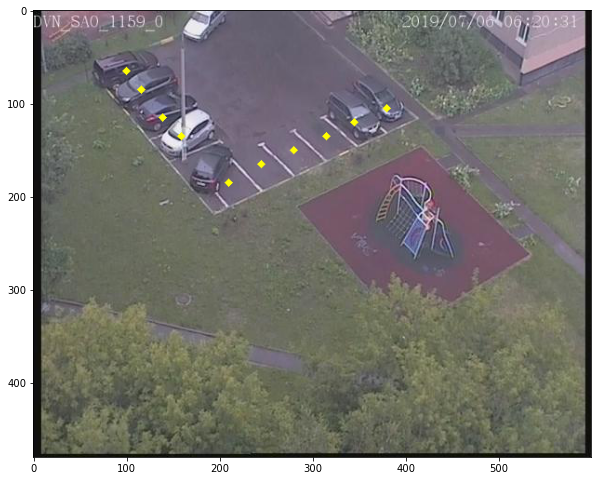

In [4]:
plt.figure(figsize=(10,10))
parking = im
for key in inputs.keys():
    parking = cv2.circle(np.asarray(parking), inputs[key], 2, (255, 255, 0), thickness=4, lineType=8, shift=0)
plt.imshow(parking)

C:\Users\772\anaconda3\lib\site-packages\torchvision\ops\boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


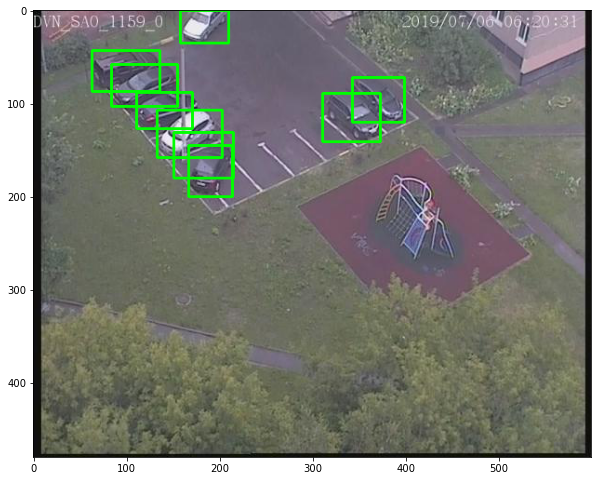

In [5]:
plt.figure(figsize=(10,10))
boxed, taken = (get_predictions(im))
plt.imshow(boxed)

In [6]:
get_busy(im, inputs)

['2', '10', '1', '3', '4', '9']